In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("train.csv")

train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3424175,0,11053717,49.00,W,5033,269.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3206179,0,5150800,57.95,W,4527,376.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3410455,0,10713596,115.95,W,2772,512.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3058578,0,1611950,100.00,H,14290,512.0,150.0,visa,226.0,...,chrome 62.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
4,3242131,0,6111087,95.00,W,12839,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

### Target Column "isFraud"

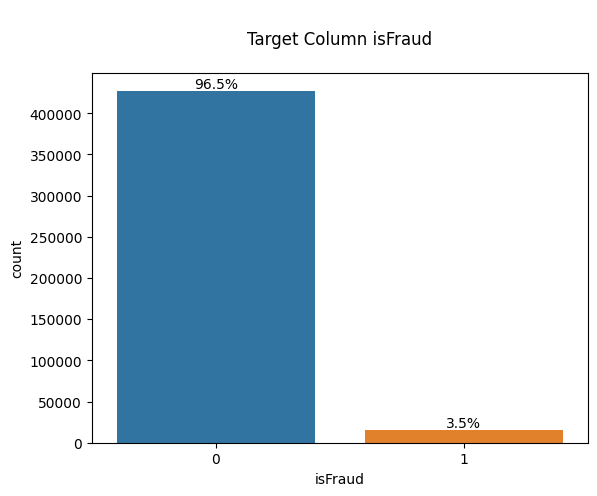

In [64]:
pt = sns.countplot(x='isFraud', data = train_df)
plt.title("\nTarget Column isFraud\n")

for a in pt.patches:
	x = a.get_bbox().get_points()[:,0]
	y = a.get_bbox().get_points()[1,1]
	pt.annotate('{:.1f}%'.format(100.*y/len(train_df)), (x.mean(), y), 
			ha='center', va='bottom') 

plt.show()

Clearly, our target column is highly Imbalanced. If we make a predictor which always output 0 then we will get 96.5 % Accuracy, but that will never be able to predict the fraudulent transactions. We will need a model that can give us good f1score as well.

### ProductCD

In [65]:
train_df["ProductCD"].describe()

count     442905
unique         5
top            W
freq      329962
Name: ProductCD, dtype: object

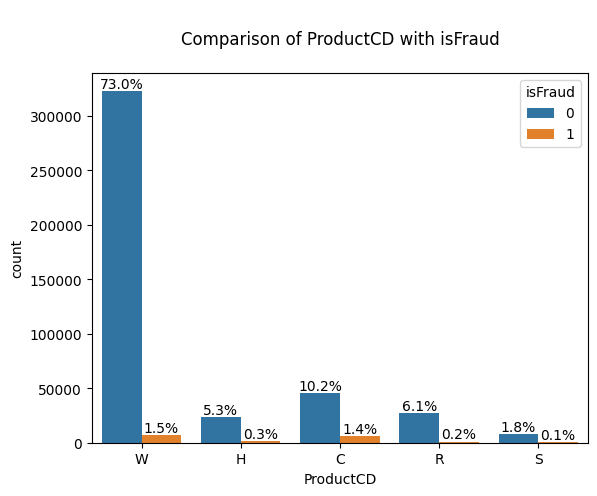

In [66]:
pt = sns.countplot(x='ProductCD', hue='isFraud', data = train_df)
plt.title("\nComparison of ProductCD with isFraud\n")

for a in pt.patches:
  x=a.get_bbox().get_points()[:,0]
  y=a.get_bbox().get_points()[1,1]
  pt.annotate('{:.1f}%'.format(100.*y/len(train_df)), (x.mean(), y), 
          ha='center', va='bottom') 

plt.show()

ProductCD mostly acquires the category W. Even though the times when the productCD acquires category C is fairly low in comparison to the category W, the times when their entries becomes fraudulent are comparable.

### Card 1 - 6 

In [67]:
cardf = ['card'+str(i) for i in range(1,7)]

In [68]:
for f in cardf :
    print("\n" +  f  + "\n")
    print(train_df[f].describe())

print("\n")
print("Number of unique values that each card column contains - ")
for f in cardf :
    print(f + " -> %d"% (train_df[f].nunique()))


card1

count    442905.000000
mean       9901.266082
std        4901.960786
min        1001.000000
25%        6019.000000
50%        9680.000000
75%       14184.000000
max       18396.000000
Name: card1, dtype: float64

card2

count    436201.000000
mean        362.542367
std         157.784513
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

card3

count    441724.000000
mean        153.188550
std          11.314301
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64

card4

count     441714
unique         4
top         visa
freq      288368
Name: card4, dtype: object

card5

count    439730.000000
mean        199.276736
std          41.232396
min         100.000000
25%         166.000000
50%         226.000000
75%         226.000000
max         237.000000
Name: card5, dtype: float64

card6

count    

#### Histogram Plots for card1, card2, card3 and card5

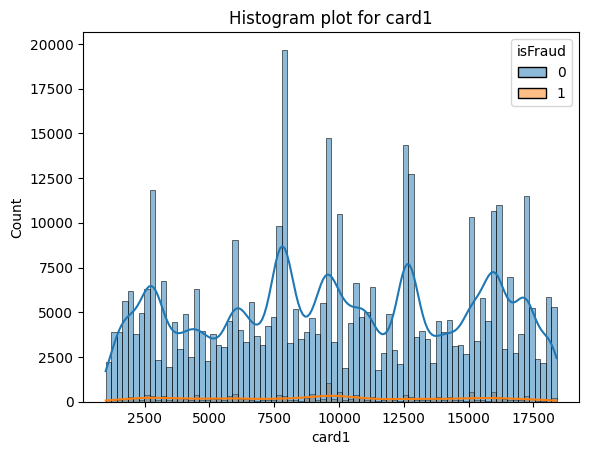

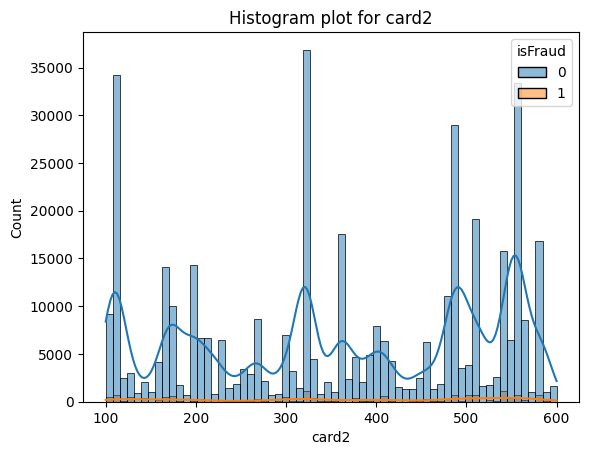

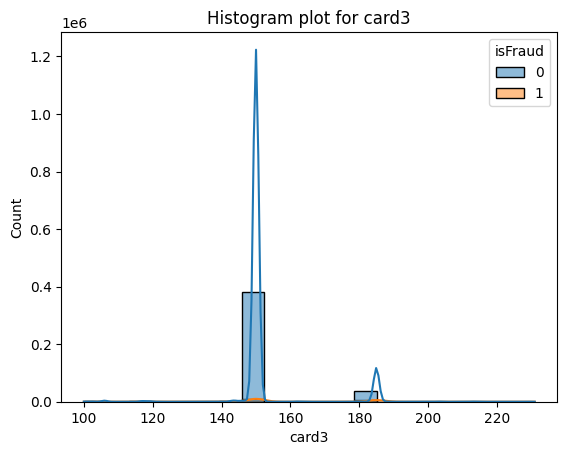

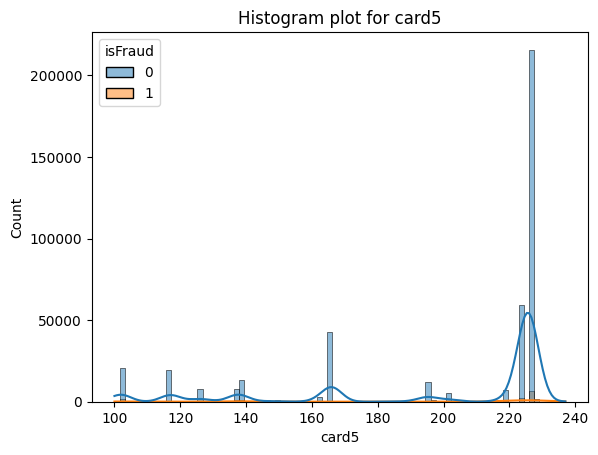

In [69]:
histf = ["card1", "card2", "card3", "card5"]
for f in histf:
	sns.histplot(x=f,hue='isFraud', data=train_df, kde=True)
	plt.title("Histogram plot for " + f)
	plt.show()

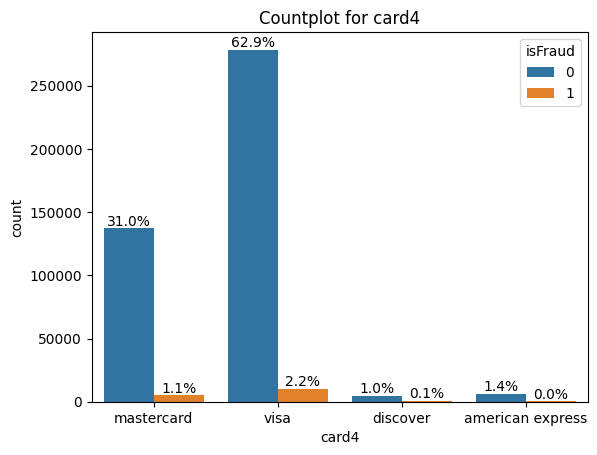

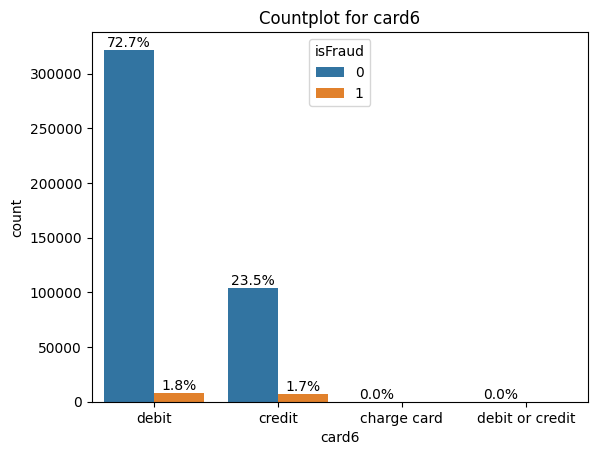

In [70]:
countf = ["card4", "card6"]
for f in countf:
    pt = sns.countplot(x=f,hue='isFraud', data=train_df)
    for p in pt.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        pt.annotate('{:.1f}%'.format(100.*y/len(train_df)), (x.mean(), y), ha='center', va='bottom')

    plt.title("Countplot for " + f)
    plt.show()

Card 1, 2, 3 and 5, all are numerical encoded categorical columns. Card1 has the highest number of categories. We cannot interpret anything just by values.

Card 4 tells us the comapany of the card. Mostly people own Mastercard or visa cards.

Card 6 tells us the type of the card. Two most used type of cards are credit and debit cards.

Credit card has the highest percentage of frauds.

### M Features

In [71]:
mfeatures = ["M"+str(i) for i in range(1,10)]

In [72]:
for f in mfeatures :
    print("\n" +  f  + "\n")
    print(train_df[f].describe())

print("\n")
print("Number of unique values that each M column contains - ")
for f in mfeatures :
    print(f + " -> %d"% (train_df[f].nunique()))


M1

count     239523
unique         2
top            T
freq      239505
Name: M1, dtype: object

M2

count     239523
unique         2
top            T
freq      214073
Name: M2, dtype: object

M3

count     239523
unique         2
top            T
freq      188857
Name: M3, dtype: object

M4

count     231758
unique         3
top           M0
freq      147474
Name: M4, dtype: object

M5

count     180164
unique         2
top            F
freq       99584
Name: M5, dtype: object

M6

count     316119
unique         2
top            F
freq      171103
Name: M6, dtype: object

M7

count     183061
unique         2
top            F
freq      158440
Name: M7, dtype: object

M8

count     183071
unique         2
top            F
freq      116401
Name: M8, dtype: object

M9

count     183071
unique         2
top            T
freq      154135
Name: M9, dtype: object


Number of unique values that each M column contains - 
M1 -> 2
M2 -> 2
M3 -> 2
M4 -> 3
M5 -> 2
M6 -> 2
M7 -> 2
M8 -> 2
M9 -> 

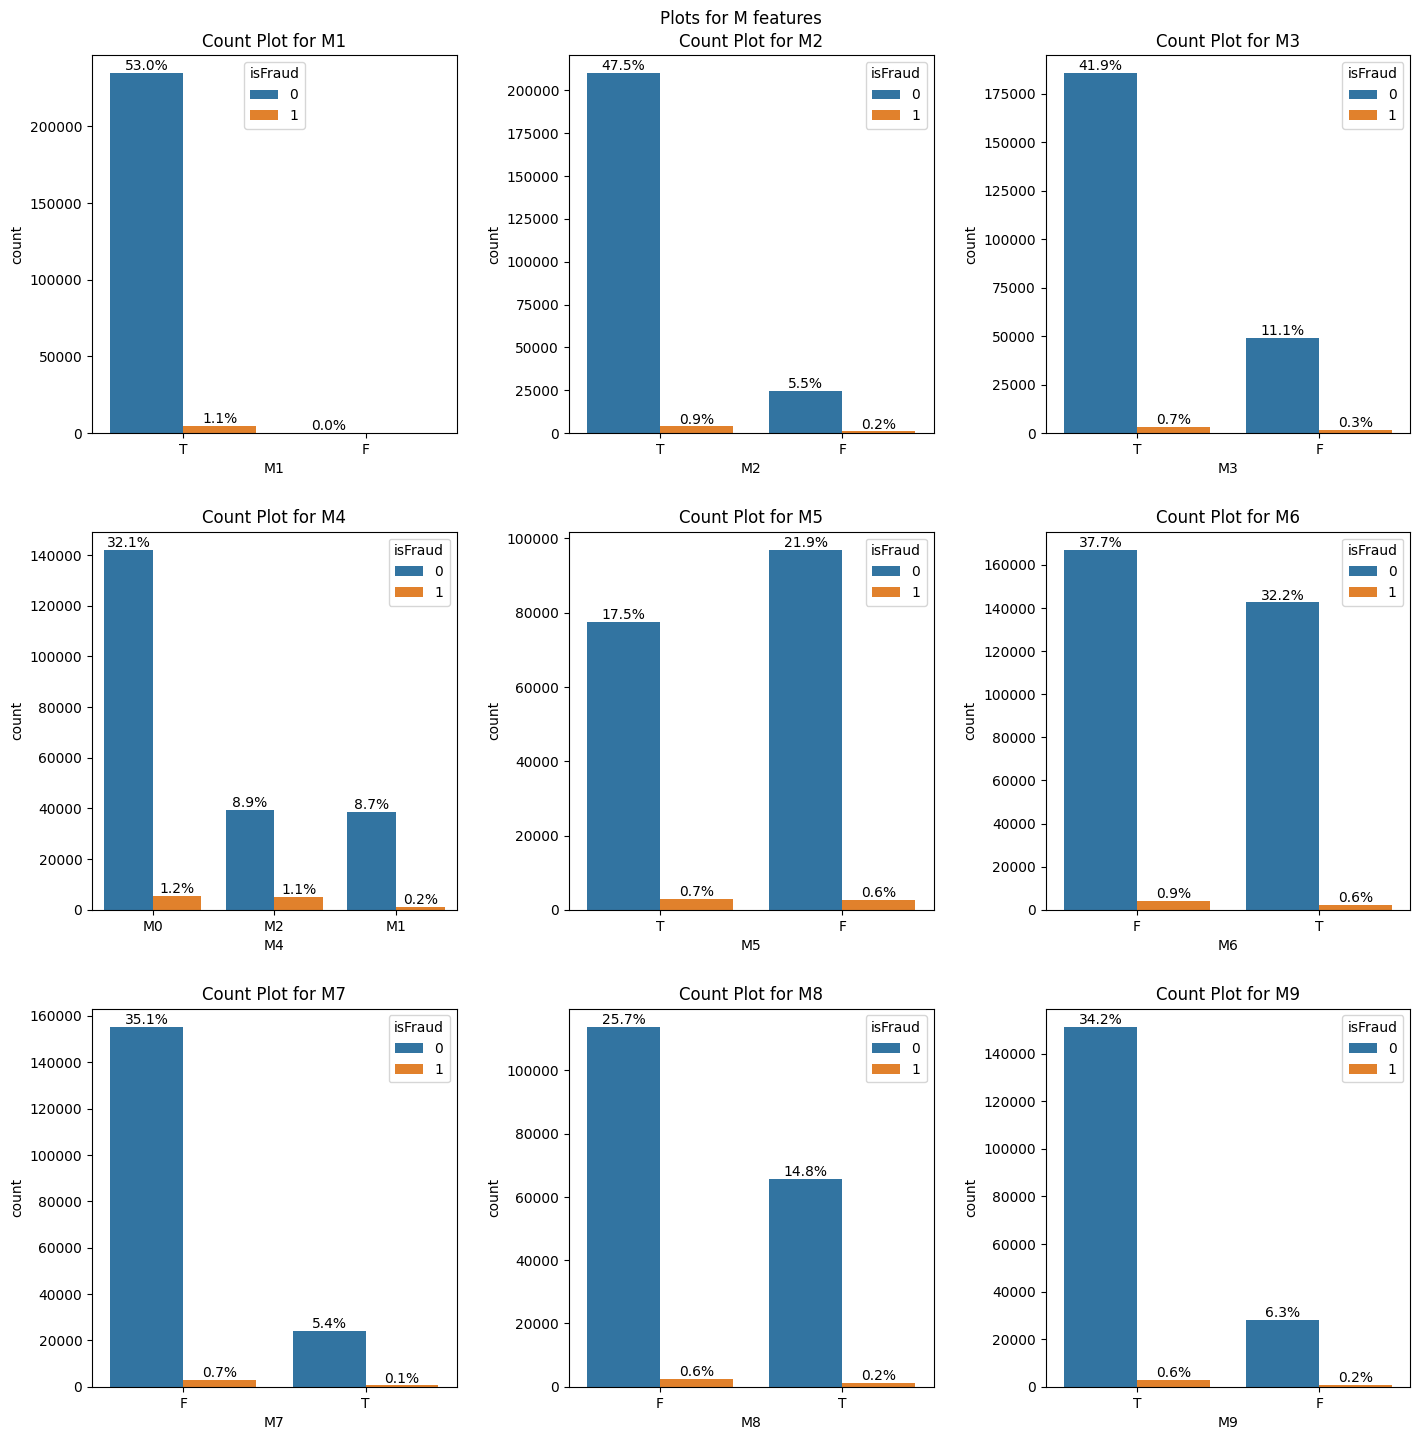

In [73]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

fig.tight_layout(pad=5.0)
fig.suptitle('Plots for M features')
index = 0

for i in range(3):
    for j in range(3):
        if(index == len(mfeatures)):	break
        
        f = mfeatures[index]
        index += 1
        
        sns.countplot(x=f,hue='isFraud', data=train_df, ax=axes[i,j])
        
        for p in axes[i,j].patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            axes[i,j].annotate('{:.1f}%'.format(100.*y/len(train_df)), (x.mean(), y), ha='center', va='bottom') 

        axes[i,j].set_title("Count Plot for " + f)

These features gives us the information about various match values, like whether the name on the card matches with the databases name or not etc. Thus. all the feature values have been categorized under True and False values.

Majority of the Entries in the dataset doesn't have information about M features.

### addr1 - addr2

In [74]:
addrf = ['addr'+str(i) for i in range(1,3)]

In [75]:
train_df['addr1'].describe()

count    393811.000000
mean        290.654596
std         101.745146
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64

In [76]:
train_df['addr2'].describe()

count    393811.000000
mean         86.799658
std           2.684822
min          10.000000
25%          87.000000
50%          87.000000
75%          87.000000
max         102.000000
Name: addr2, dtype: float64

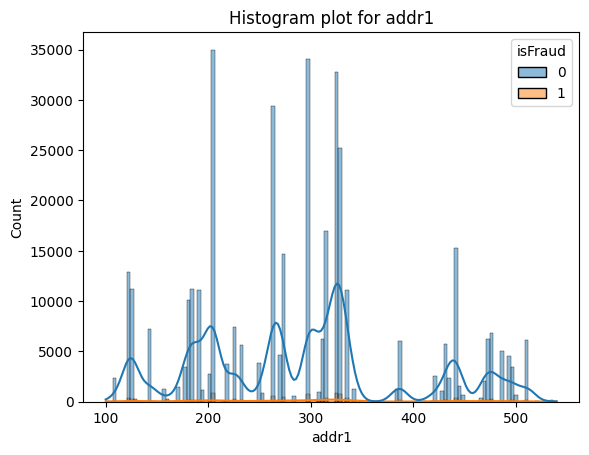

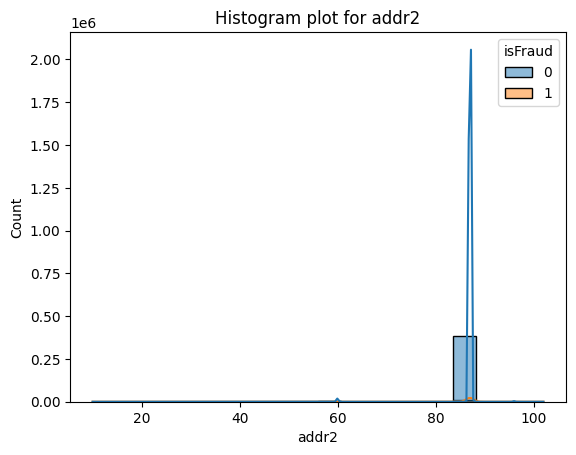

In [77]:
for f in addrf :
	sns.histplot(x=f,hue='isFraud', data=train_df, kde=True)
	plt.title("Histogram plot for " + f)
	plt.show()

addr1 might correspond to some type of city zip codes.

addr2 acquires 87 as its value for the majority of entries in the dataset. This is might correspond to some type of code for the billing country.

### DeviceType

In [78]:
train_df["DeviceType"].describe()

count      105401
unique          2
top       desktop
freq        63885
Name: DeviceType, dtype: object

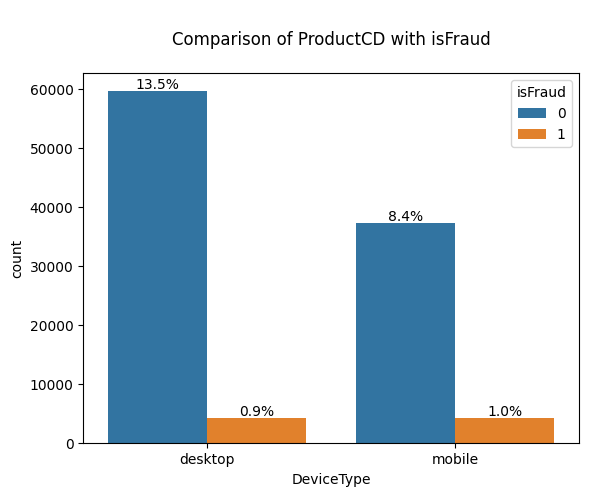

In [79]:
pt = sns.countplot(x='DeviceType', hue='isFraud', data = train_df)
plt.title("\nComparison of ProductCD with isFraud\n")

for a in pt.patches:
	x=a.get_bbox().get_points()[:,0]
	y=a.get_bbox().get_points()[1,1]
	pt.annotate('{:.1f}%'.format(100.*y/len(train_df)), (x.mean(), y), ha='center', va='bottom') 

plt.show()

DeviceType information is not present for many entries in the dataset.

A transaction done via mobile is likely be fraudulent in comparison to the transactions done via Desktop.

### TransactionAmt

In [80]:
train_df["TransactionAmt"].describe()

count    442905.000000
mean        135.273690
std         232.955213
min           0.251000
25%          43.744000
50%          68.950000
75%         125.000000
max        6085.230000
Name: TransactionAmt, dtype: float64

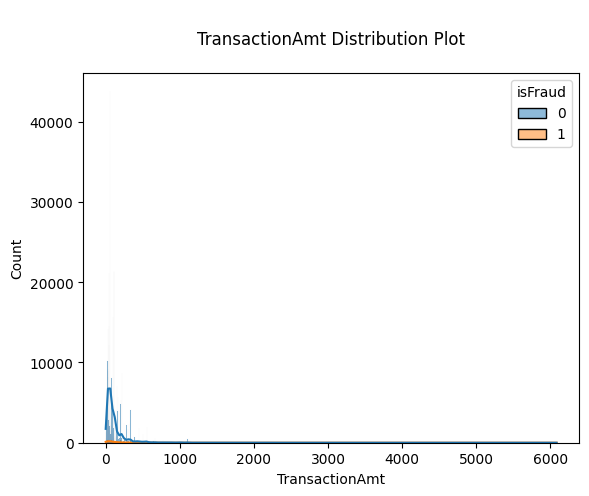

In [81]:
sns.histplot(x='TransactionAmt', hue='isFraud', data=train_df, kde=True)
plt.title('\nTransactionAmt Distribution Plot\n')
plt.show()

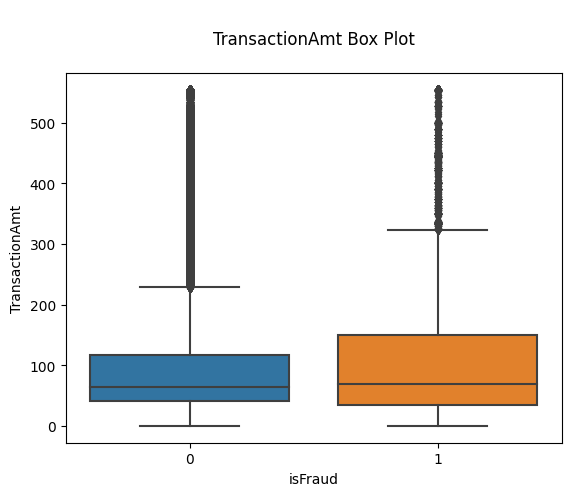

In [82]:
sns.boxplot(y='TransactionAmt', x='isFraud', data=train_df[train_df['TransactionAmt']<=np.percentile(train_df['TransactionAmt'], 97)])
# Considered upto 97 th percentile
plt.title('\nTransactionAmt Box Plot\n')
plt.show()

Both the box plots have similar medians but different median.
By observation, we can say that the avg Transaction Amount is greater for fraudulent Transactions

### C 1-14

In [4]:
cfeatures = ["C"+str(i) for i in range(1,15)]

In [84]:
for f in cfeatures:
    print(f)
    print(train_df[f].describe())
    print("Number of Unique Elements - {}".format(train_df[f].nunique()))

C1
count    442905.000000
mean         14.254165
std         135.955827
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        4685.000000
Name: C1, dtype: float64
Number of Unique Elements - 1412
C2
count    442905.000000
mean         15.440282
std         157.244297
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        5691.000000
Name: C2, dtype: float64
Number of Unique Elements - 1112
C3
count    442905.000000
mean          0.005733
std           0.157655
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: C3, dtype: float64
Number of Unique Elements - 25
C4
count    442905.000000
mean          4.179122
std          70.003818
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2253.000000
Name: C4, dtype: float64
Number of Unique Elements - 1056
C5
count    442905.000

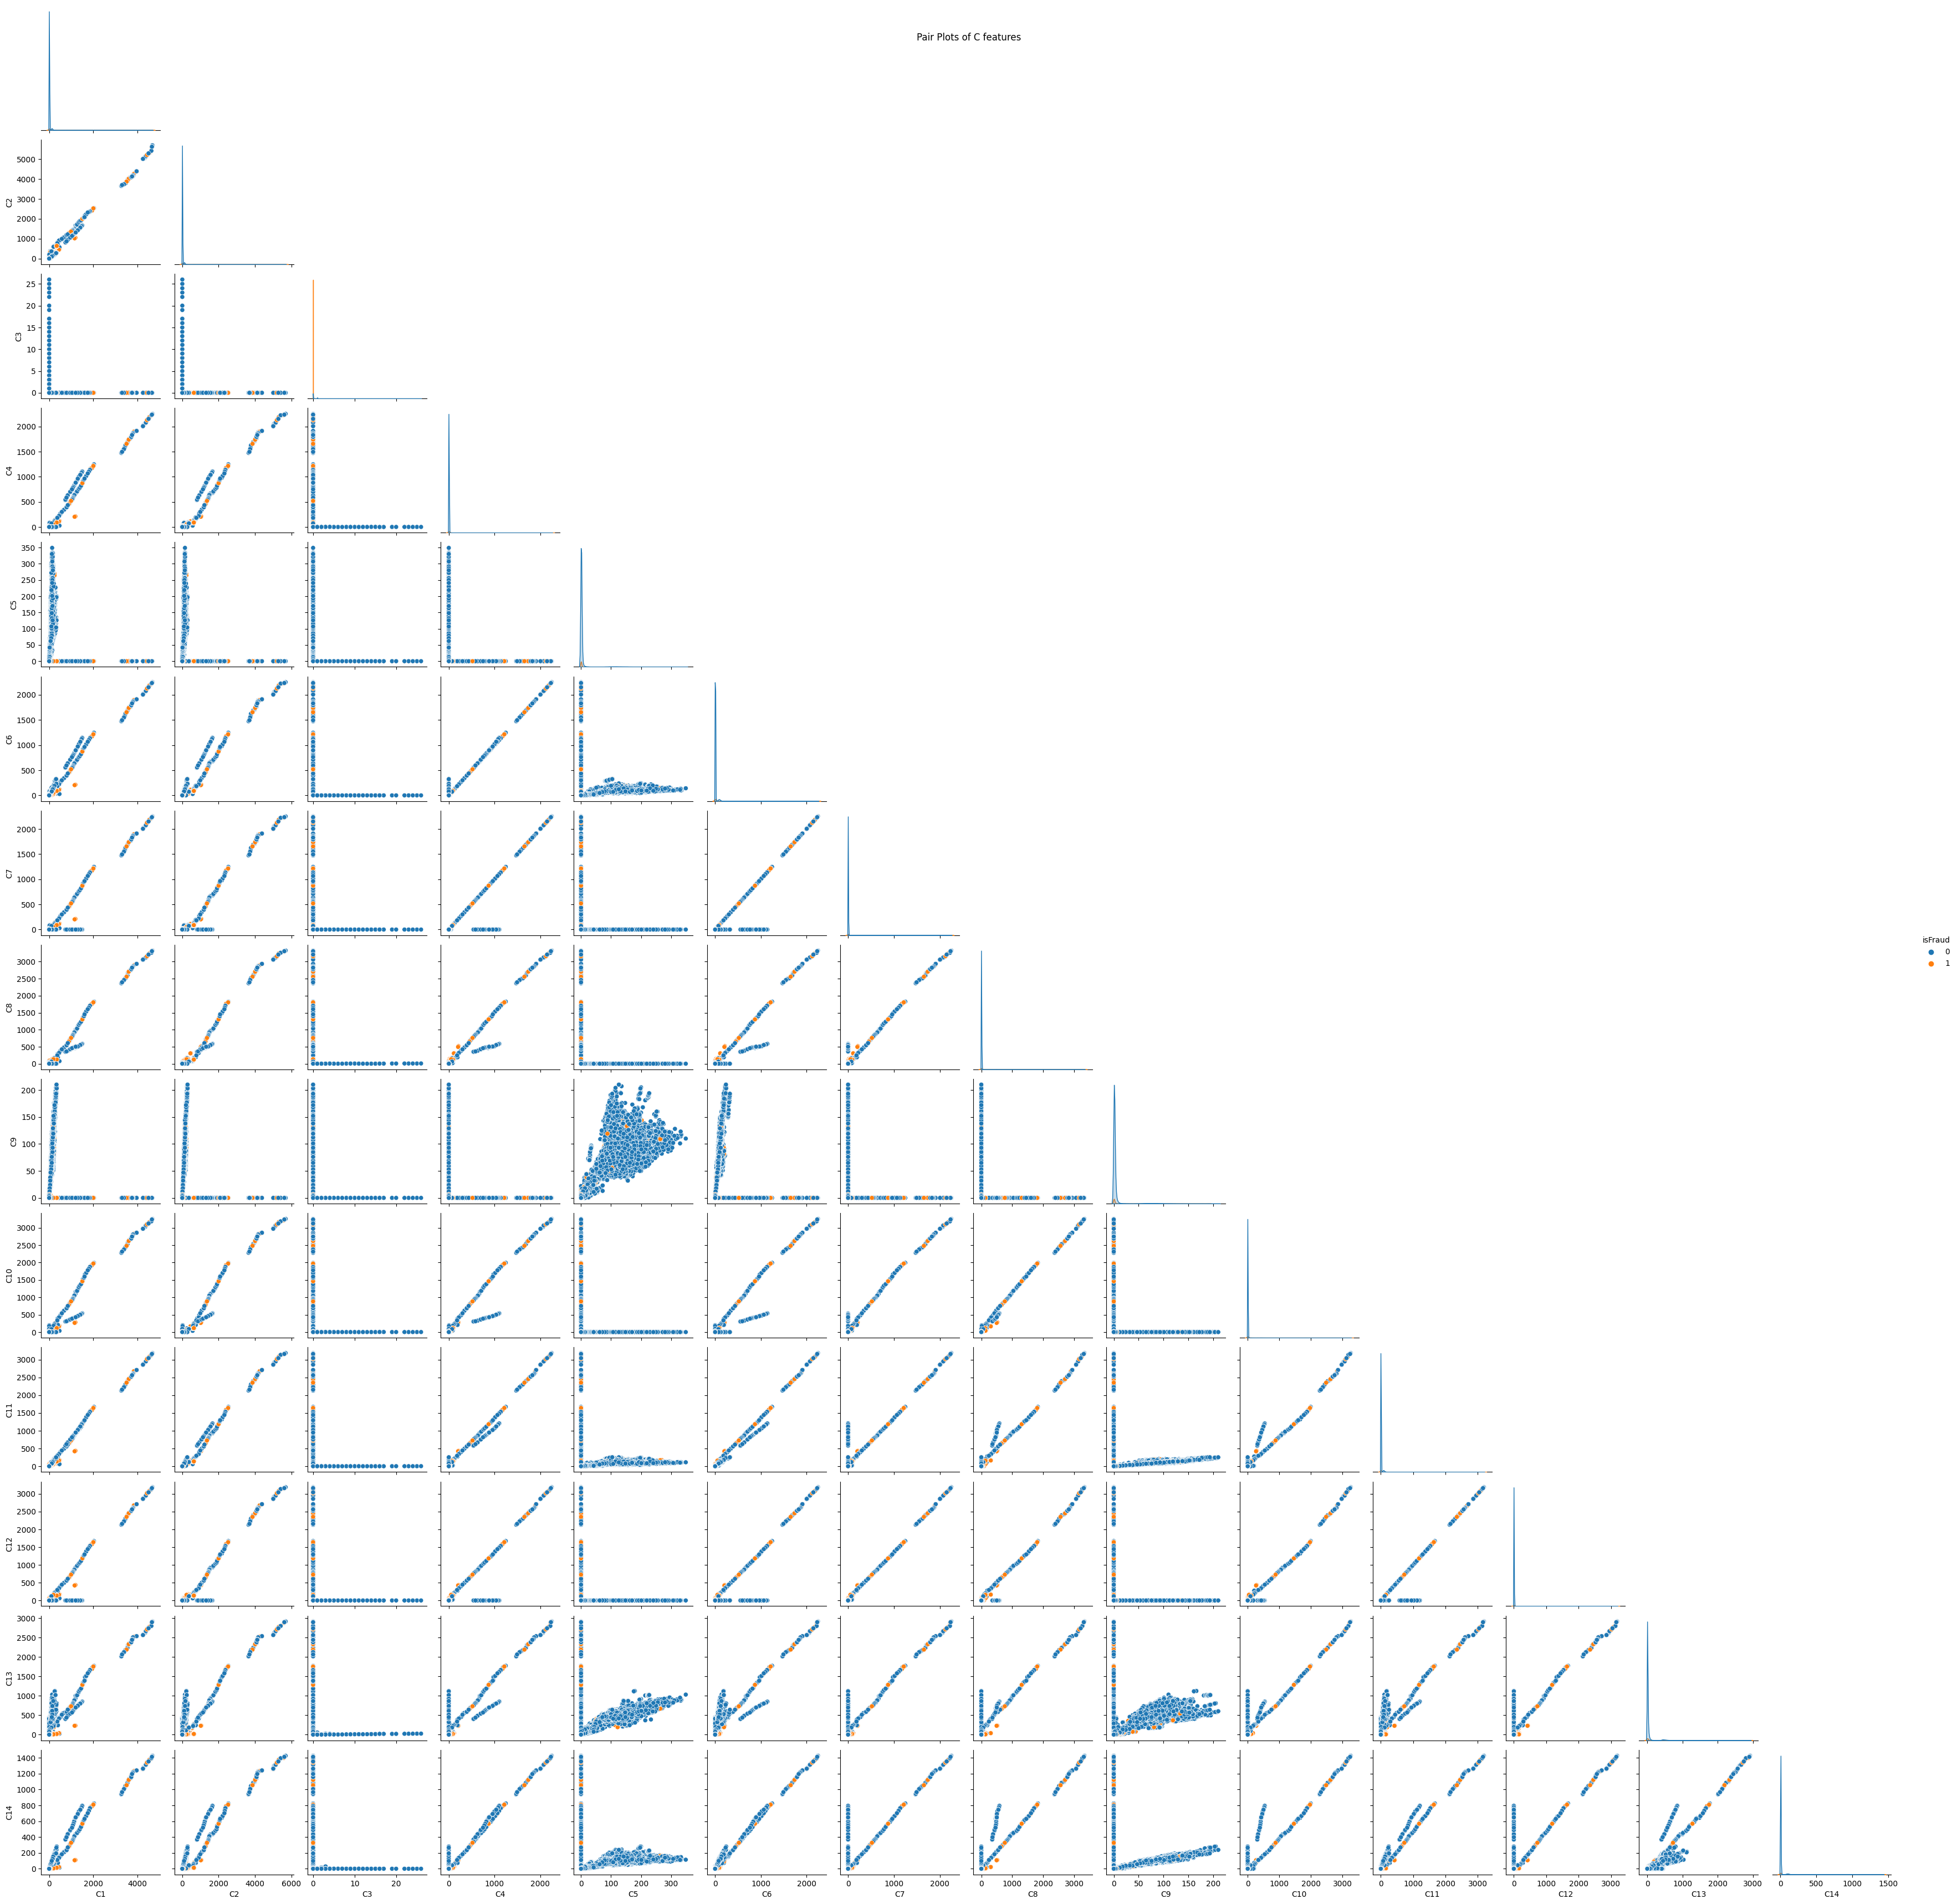

In [85]:
sns.pairplot(vars = cfeatures, hue = 'isFraud' , data = train_df, corner=True)
plt.suptitle("\nPair Plots of C features\n")
plt.show()

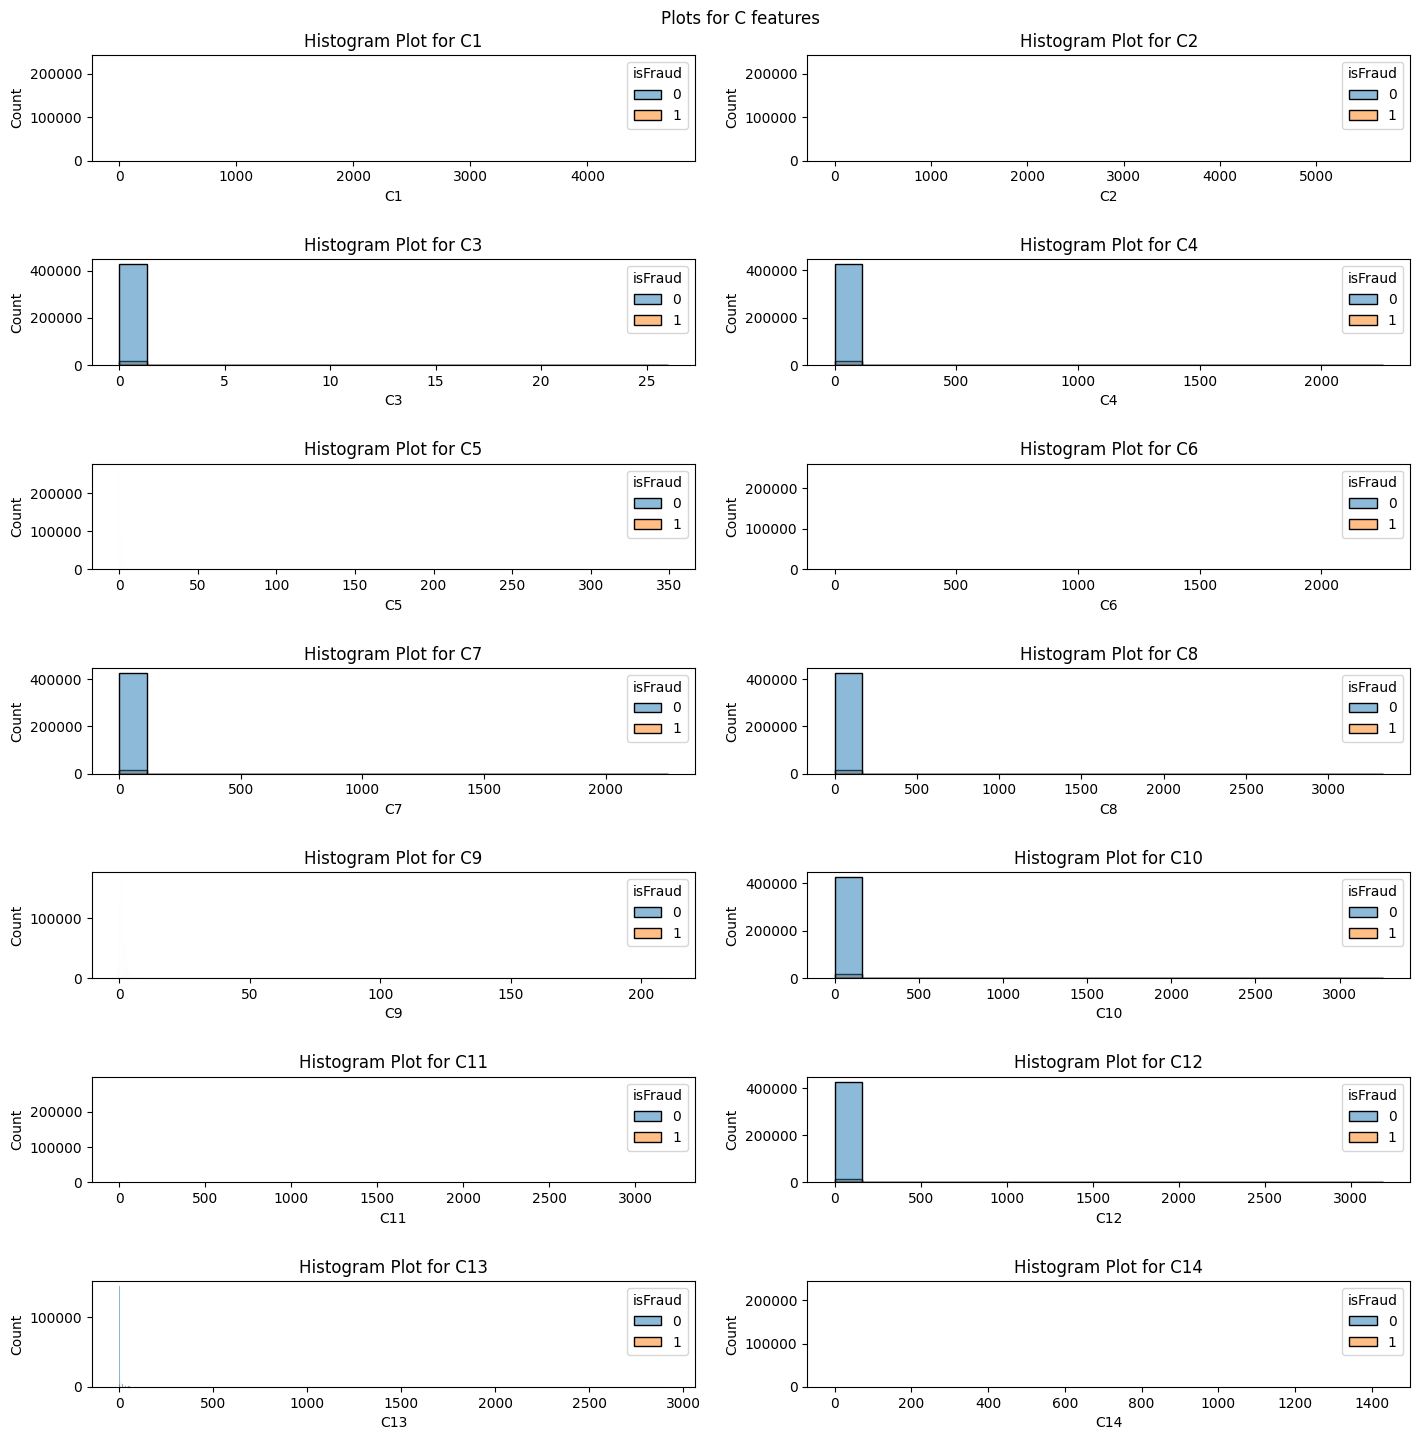

In [5]:
fig, axes = plt.subplots(7, 2, figsize=(15, 15))

fig.tight_layout(pad=5.0)
fig.suptitle('Plots for C features')
index = 0

for i in range(7):
    for j in range(2):
        if(index == len(cfeatures)):	break
        
        f = cfeatures[index]
        index += 1
        
        sns.histplot(x=f,hue='isFraud', data=train_df, ax=axes[i,j]) 
        axes[i,j].set_title("Histogram Plot for " + f)

C features take 0 as the value for most of the entries.


C features are highly correlated with one another as we can see from the pair plots. (Most of the pair plots are linear)